<a href="https://colab.research.google.com/github/Saber0275/2-simple-Brain-Detection-Models/blob/main/Data_augmentation%2C_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
<div class="alert alert-info">
<h1><center><font color=red> Data Augmentation To Address Overfitting In Flower Classification CNN <font></center></h1>

- By Saber Saharkhiz
</div>

- In this notebook I will build a CNN to classify flower images. I will also see how my model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [2]:
# To see if it is available on GPU:

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL.Image as Image
import PIL #for image visualization by pillow python
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:3]  #glob→ all the images (3 of them)

[PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg')]

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [13]:
dandelion = list(data_dir.glob('dandelion/*'))
dandelion[:5]

[PosixPath('datasets/flower_photos/dandelion/7062171343_db61c92737_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8980145452_efbd6e3b04.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4528742654_99d233223b_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5607669502_ccd2a76668_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4633323785_20676ff914_m.jpg')]

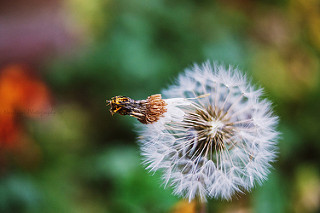

In [14]:
PIL.Image.open(str(dandelion[0]))

# Read flowers images from disk into numpy array using opencv

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [17]:
flowers_images_dict['tulips'][:5]

[PosixPath('datasets/flower_photos/tulips/17844723633_da85357fe3.jpg'),
 PosixPath('datasets/flower_photos/tulips/15090146325_b7e1249e60.jpg'),
 PosixPath('datasets/flower_photos/tulips/6267021825_a8316e0dcc_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/11746367_d23a35b085_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13176521023_4d7cc74856_m.jpg')]

In [18]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'

In [10]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape
# (x,y, RGB)

(213, 320, 3)

In [20]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [21]:
#resize all images by for loop:

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

**Train test split**

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [24]:
#Normalization:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),  #16 filters by size of 3 (3 by 3)
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15) 

Epoch 1/15
86/86 [==============================] - 11s 23ms/step - loss: 1.3169 - accuracy: 0.4328
Epoch 2/15
86/86 [==============================] - 2s 23ms/step - loss: 1.0066 - accuracy: 0.5930
Epoch 3/15
86/86 [==============================] - 2s 23ms/step - loss: 0.8552 - accuracy: 0.6675
Epoch 4/15
86/86 [==============================] - 2s 23ms/step - loss: 0.6951 - accuracy: 0.7376
Epoch 5/15
86/86 [==============================] - 2s 23ms/step - loss: 0.4686 - accuracy: 0.8194
Epoch 6/15
86/86 [==============================] - 2s 23ms/step - loss: 0.2969 - accuracy: 0.9001
Epoch 7/15
86/86 [==============================] - 2s 22ms/step - loss: 0.1571 - accuracy: 0.9499
Epoch 8/15
86/86 [==============================] - 2s 23ms/step - loss: 0.0795 - accuracy: 0.9789
Epoch 9/15
86/86 [==============================] - 2s 23ms/step - loss: 0.0440 - accuracy: 0.9895
Epoch 10/15
86/86 [==============================] - 2s 23ms/step - loss: 0.0371 - accuracy: 0.9931
Epoch 11

In [26]:
#validation on test:
model.evaluate(X_test_scaled,y_test)

# so there is overfitting!!! → how to handle it? by data augmentation

29/29 [==============================] - 1s 16ms/step - loss: 2.1326 - accuracy: 0.6569


[2.132641315460205, 0.656862735748291]

In [27]:
#Lets predict and see some of the results: 

predictions = model.predict(X_test_scaled)
predictions

#It shows as tensor (array) ► we have to use argmax from numpy to see the result:

array([[ -4.5745063,  -7.851604 ,  -8.106688 ,   5.910222 ,   7.095975 ],
       [ -7.7909756, -13.348156 ,   4.8459744,   9.8089285,  -3.597117 ],
       [ 11.760625 ,  -7.786506 ,  -9.85799  , -11.888021 ,  10.316376 ],
       ...,
       [ -4.470522 , -11.112358 ,  -1.3186165,  11.298158 ,  -4.7695045],
       [  5.10015  ,  -9.820998 ,  -5.9937215,  -6.4903326,  18.981855 ],
       [ -4.9150085, -18.874731 ,  -3.8721359,   8.901697 ,  -4.2883043]],
      dtype=float32)

In [28]:
score = tf.nn.softmax(predictions[6])

In [29]:
np.argmax(score)
#Our prediction says that the 6th prediction is rose

4

In [30]:
y_test[6]
#It says it is tulips!

4

## *** Data Augmentation***

In [31]:
#Improving Test Accuracy Using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

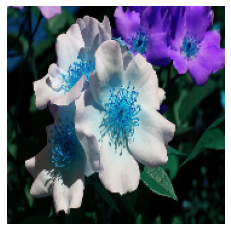

In [32]:
#Original Image:

plt.axis('off')
plt.imshow(X[2])

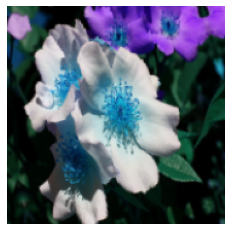

In [33]:
#After Augmentation:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

# **Train the model using data augmentation and a drop out layer**

In [34]:
num_classes = 5 #5 different types of flowers

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),  #20% dropout
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 3s 25ms/step - loss: 1.4399 - accuracy: 0.3888
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 1.1556 - accuracy: 0.5029
Epoch 3/30
86/86 [==============================] - 2s 24ms/step - loss: 1.0572 - accuracy: 0.5756
Epoch 4/30
86/86 [==============================] - 2s 24ms/step - loss: 0.9796 - accuracy: 0.6086
Epoch 5/30
86/86 [==============================] - 2s 24ms/step - loss: 0.9258 - accuracy: 0.6315
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8702 - accuracy: 0.6555
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8334 - accuracy: 0.6672
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8292 - accuracy: 0.6781
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.7957 - accuracy: 0.6919
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.7907 - accuracy: 0.6988
Epoch 11/

In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.7171 - accuracy: 0.7353


[0.7170816659927368, 0.7352941036224365]

**We can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 70%**

# ***`Transfer Learning`***


In [11]:
#resize to 224 all images by for loop, since the input of the pre-trained model is deemed to be 224:

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [14]:
#Normalization:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [16]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 14s 41ms/step - loss: 0.8079 - acc: 0.7049
Epoch 2/5
86/86 [==============================] - 3s 41ms/step - loss: 0.4079 - acc: 0.8608
Epoch 3/5
86/86 [==============================] - 4s 41ms/step - loss: 0.3207 - acc: 0.8957
Epoch 4/5
86/86 [==============================] - 3s 40ms/step - loss: 0.2639 - acc: 0.9168
Epoch 5/5
86/86 [==============================] - 3s 41ms/step - loss: 0.2243 - acc: 0.9324


In [17]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 54ms/step - loss: 0.3691 - acc: 0.8682


[0.3690870702266693, 0.8681917190551758]